# Introduction

There is a lot of information on runners and their performance for the
Boston Marathon. Pick a year (post-2012 has more info) and do some
clustering.
Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:

1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).

2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.

3. Do the same things as above for finishing time (which group runs
fastest).

In [1]:
import pandas as pd
import numpy as np # linear algebra
import scipy
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./data.csv", index_col = 'bib')
data.head()

,10k,name,division,25k,gender,age,official,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
bib,,,,,,,,,,,,,,,,,,,,
W1,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
F1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
W2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
F2,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
W3,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [65]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [66]:
data.describe(include='O')

,10k,name,25k,gender,ctz,35k,state,30k,5k,half,20k,country,city,40k
count,31984,31984,31984,31984,1244,31984,29408,31984,31984,31984,31984,31984,31983,31984
unique,2766,31915,6570,2,84,9516,68,8090,1491,5651,5375,78,5934,10546
top,-,"Johnson, Patrick",-,M,GBR,-,MA,-,23.93,-,-,USA,Boston,-
freq,50,2,216,17617,171,34,7587,40,81,72,51,27233,1034,39


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [20]:
data_male = data[data['gender'] == 'M']
data_female = data[data['gender'] == 'F']

In [21]:
data_female.shape

(14367, 21)

In [22]:
from sklearn.cluster import KMeans



ValueError: could not convert string to float: 'Lancaster'

# Data exploring

In [23]:
## Age 

Text(0.5, 1.0, 'Participants per age group')

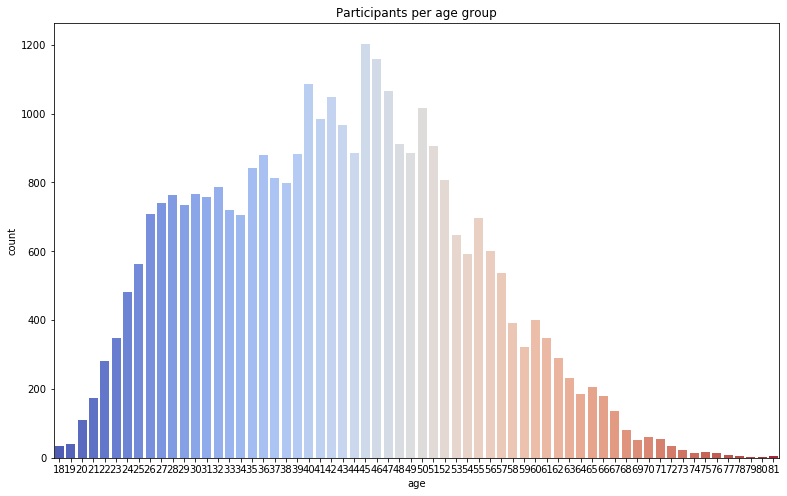

In [24]:
g = sns.countplot('age', data=data, palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Participants per age group")

In [25]:
## Age and gender

Text(0.5, 1.0, 'Participants per Age & Gender')

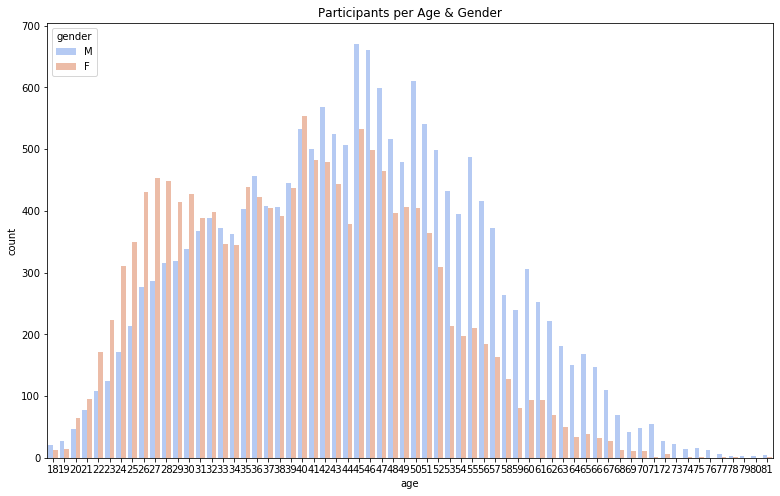

In [26]:
g = sns.countplot('age', data=data, palette="coolwarm", hue='gender')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age & Gender")

In [27]:
## Boxplot by age and gender

Text(0.5, 1.0, 'Distribution of finish times per Age group')

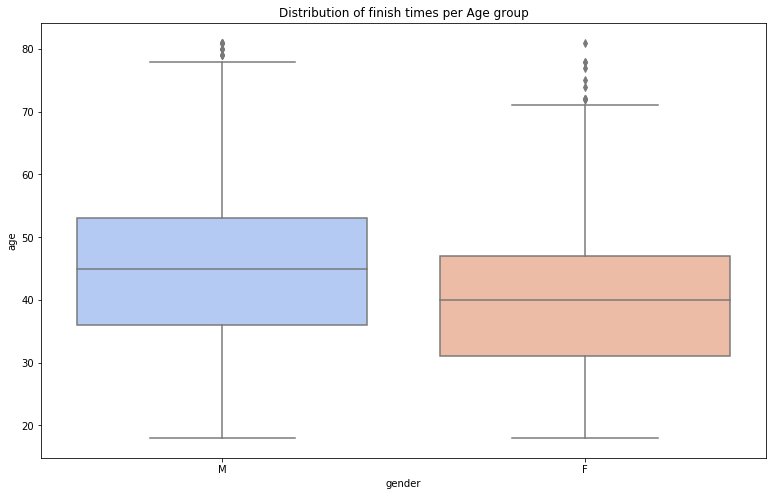

In [28]:
g = sns.boxplot(data['gender'], data['age'], palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

## Finish time

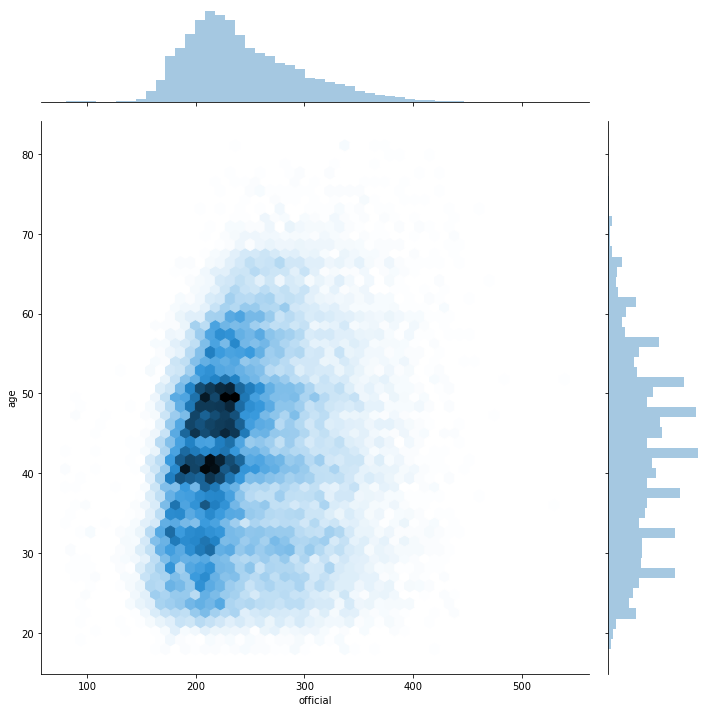

In [42]:
g = sns.jointplot( x=data['official'], y=data['age'], stat_func=None, kind='hex',  size=10)

## Country

Text(0.5, 1.0, 'Most popular Country')

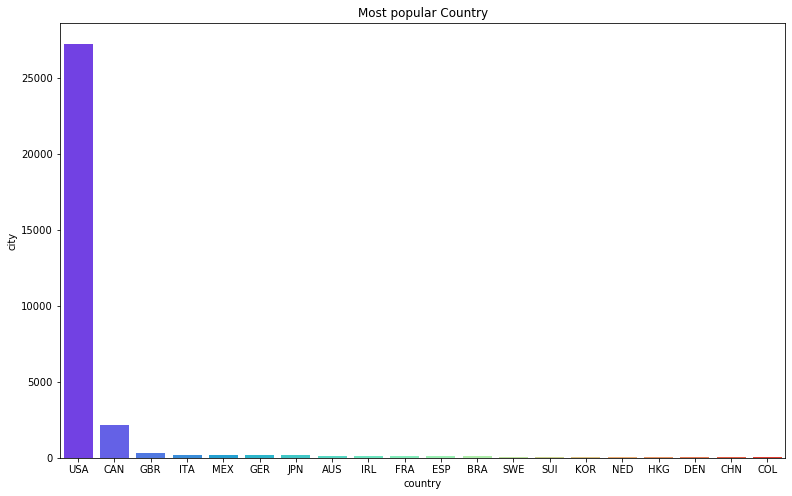

In [43]:
s = data.groupby('country').count()['city'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

In [56]:
X = data[[ 'official', 'age']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [46]:
kmeans.labels_

array([4, 4, 4, ..., 7, 5, 9], dtype=int32)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


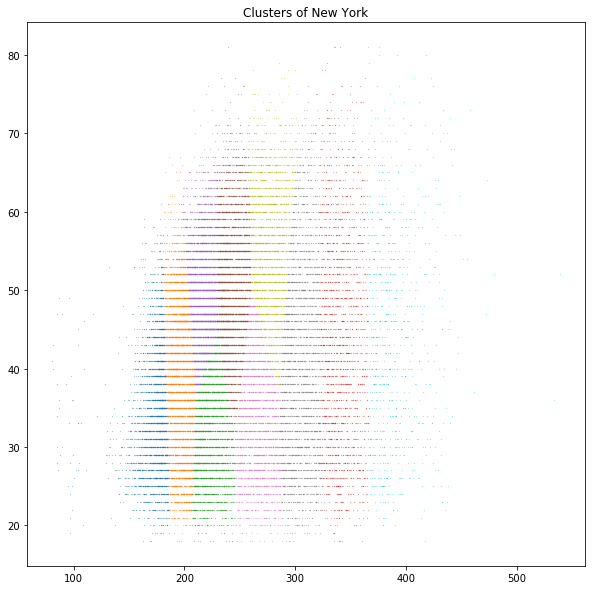

In [58]:
X['label'] = kmeans.labels_
plt.figure(figsize = (10,10))
for label in X.label.unique():
    plt.plot(X.official[X.label == label],X.age[X.label == label],'.',  markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

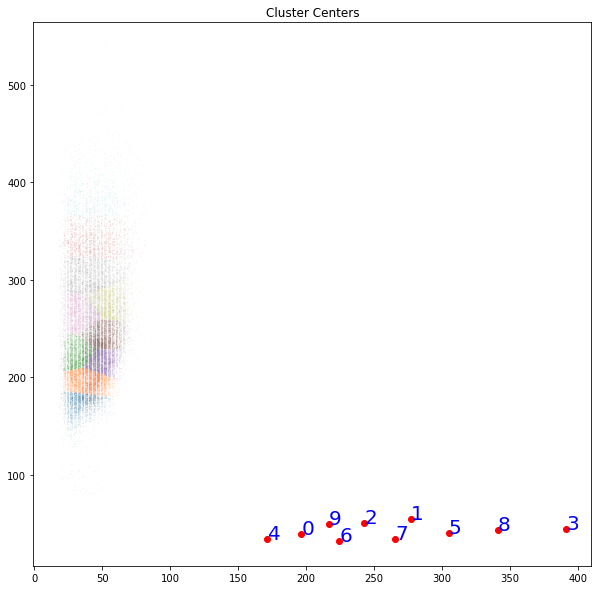

In [60]:
loc_df = X
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.age[loc_df.label == label],loc_df.official[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1)
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()